In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
def gray_scale_to_binary(gray):
    img_temp = gray
    for i, arr in enumerate(img_temp):
        img_temp[i] = [1 if val <= 128 else 0 for val in arr]
    return img_temp

def display_image(img_array):
    plt.imshow(1 - img_array, cmap='gray')
    plt.axis('off')
    plt.show()

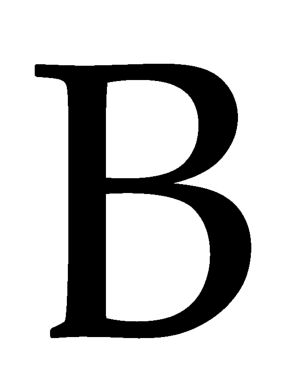

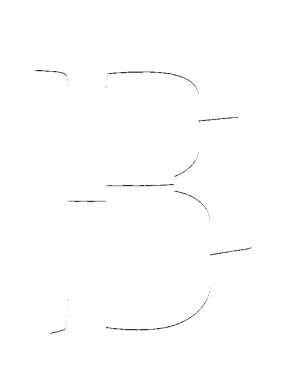

In [35]:
filename = 'B'
binary_image = cv2.imread(f'{filename}.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(binary_image, 232, 255, 0)
binary_image = gray_scale_to_binary(binary_image)
display_image(binary_image)

element = np.array([[0, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0]], np.uint8)
skel = np.zeros(binary_image.shape, np.uint8)

S = []
while cv2.countNonZero(binary_image) != 0:
    eroded = cv2.erode(binary_image, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(binary_image, temp)
    S.append(temp)
    skel = cv2.bitwise_or(skel, temp)
    binary_image = eroded.copy()

display_image(skel)

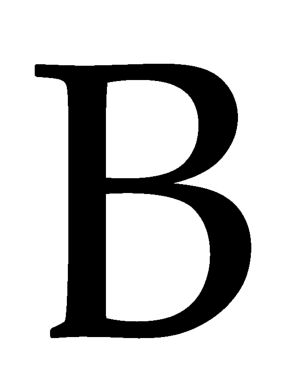

In [36]:
X = np.zeros(binary_image.shape, np.uint8)

for n, s in enumerate(S):
    for _ in range(n):
        s = cv2.dilate(s, element)
    X = cv2.bitwise_or(X, s)
    
display_image(X)